Zmienne:
 - PODM - liczba podmiotów gospodarczych w przeliczeniu na 1000 mieszkańców, - nominanta
 - BEZR - udział liczby bezrobotnych w liczbie osób w wieku produkcyjnym (%), - destymulanta
 - MIESZ - powierzchnia użytkowa mieszkań oddanych do użytkowania na 1000 ludności (w m^2), - nominanta
 - ZAL - gęstość zaludnienia (os./km2), - nominanta
 - PRZES - wskaźnik wykrywalności sprawców przestępstw kryminalnych (%) - stymulanta
 - EMI - emisja zanieczyszczeń pyłkowych na 10 km^2 - destymulanta
 - ZIEL - udział powierzchni terenów zieleni w powierzchni ogółem (%), - nominanta
 - NAKL - nakłady inwestycyjne na jednego mieszkańca (zł), - nominanta
 - WYN - przeciętne miesięczne wynagrodzenia brutto (zł). - stymulanta
j - kolumna
i - wiersz

Plik "powiaty" (dane dotyczące powiatów małopolski, bez miast na prawach powiatu, w 2023 roku):
 - NOCL - liczba miejsc noclegowych w przeliczeniu na 1000 ludności,
 - ROW - długość dróg dla rowerów (km),
 - PARK - powierzchnia parków spacerowo - wypoczynkowych (ha),
 - LAS - powierzchnia gruntów leśnych (ha),
 - KUL - ludność przypadająca na jedną instytucję kultury - centrum, dom, ośrodek kultury, klub i świetlicę
 - IMPR - liczba masowych imprez artystyczno-rozrywkowych w przeliczeniu na 100 000 ludności,
 - MUZE - liczba muzeów łącznie z oddziałami,
 - EMIS - emisja zanieczyszczeń pyłkowych (t/r),
 - PRZES - liczba przestępstw stwierdzonych przez policję w zakończonych postępowaniach przygotowawczych.

             NOCL         ROW        PARK           LAS           KUL  \
count   19.000000   19.000000   19.000000     19.000000     19.000000   
mean    34.155789   41.984211   48.127368  10505.802105   8851.421053   
std     88.572448   32.686750   82.788207  10726.549363   4547.067093   
min      2.000000    4.800000    6.200000    222.050000   2325.000000   
25%      4.715000   18.050000   10.035000   2272.725000   5387.500000   
50%      9.790000   36.300000   22.800000   7716.480000   8146.000000   
75%     16.845000   56.350000   49.120000  17238.245000  11295.000000   
max    394.510000  120.100000  370.870000  39014.330000  17785.000000   

            IMPR       MUZE        EMIS        PRZES  
count  19.000000  19.000000   19.000000    19.000000  
mean    4.473684   2.894737   24.263158  2104.578947  
std     2.294157   2.306867   31.762735  1477.530045  
min     0.000000   0.000000    2.000000   262.000000  
25%     3.000000   1.000000    5.000000  1275.000000  
50%     4.00

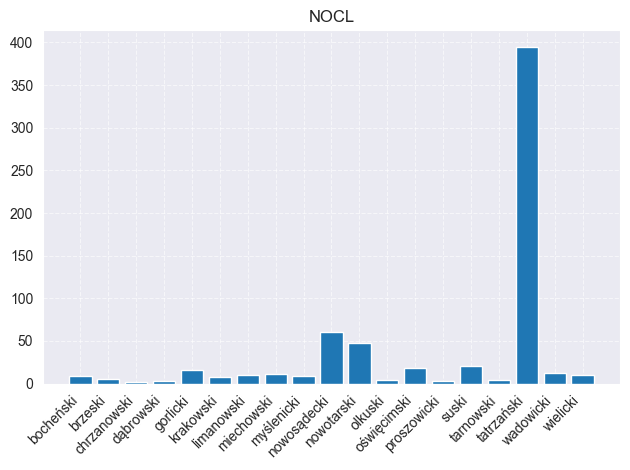

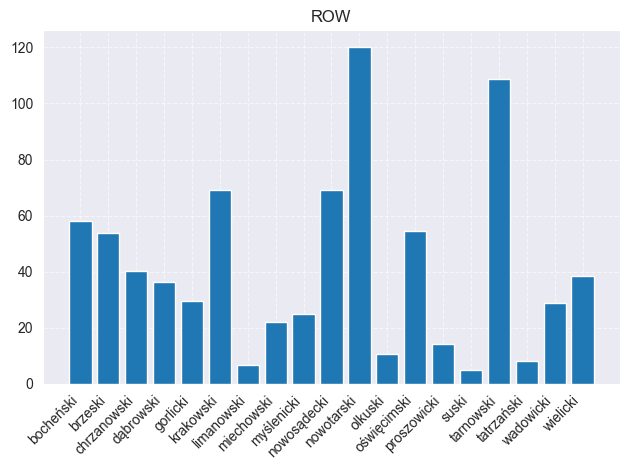

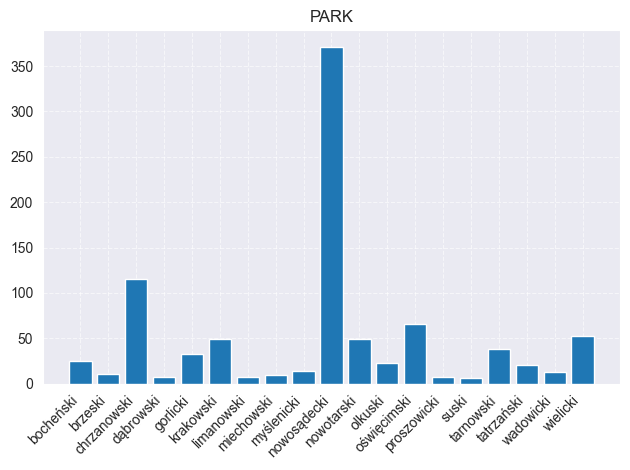

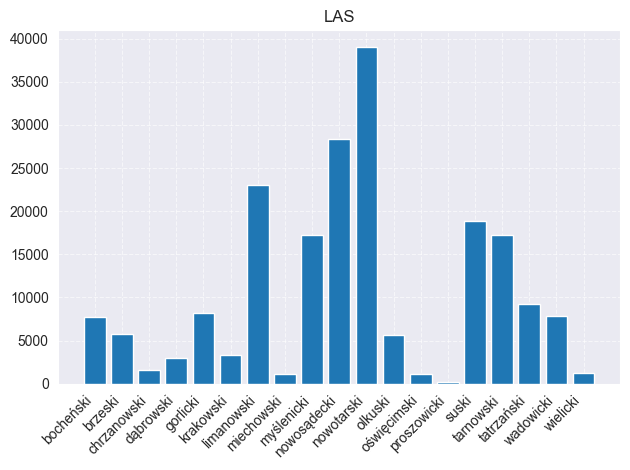

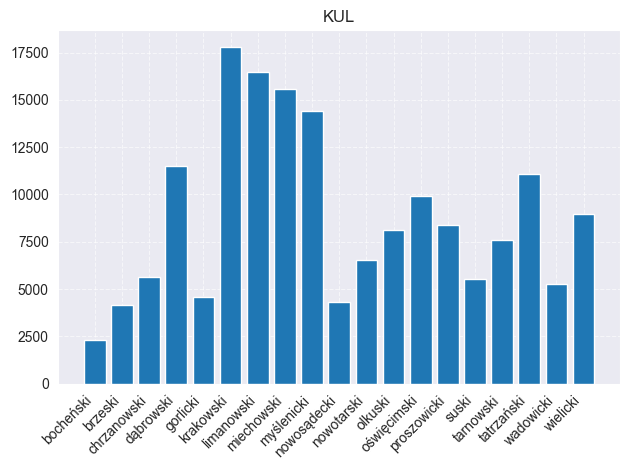

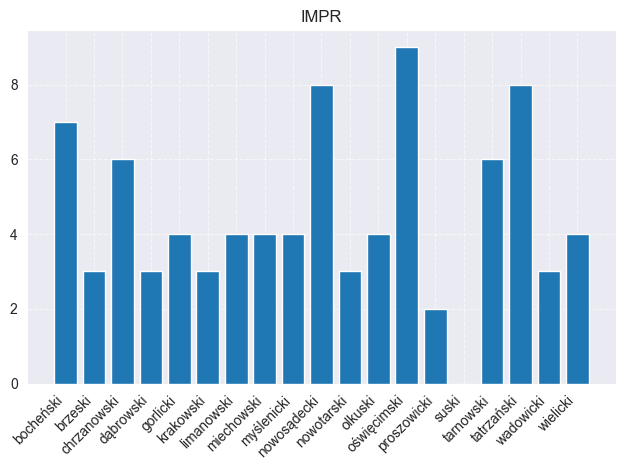

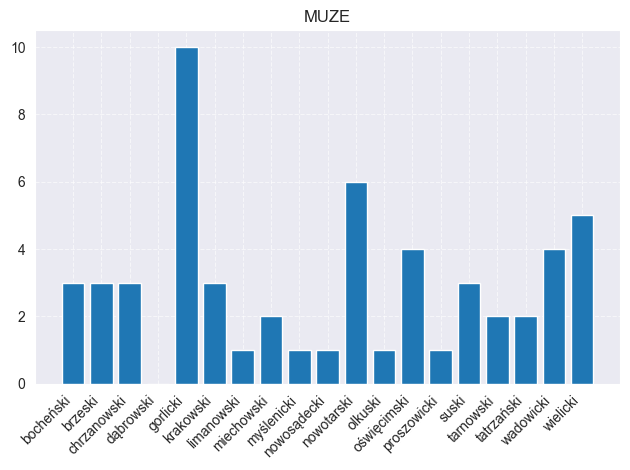

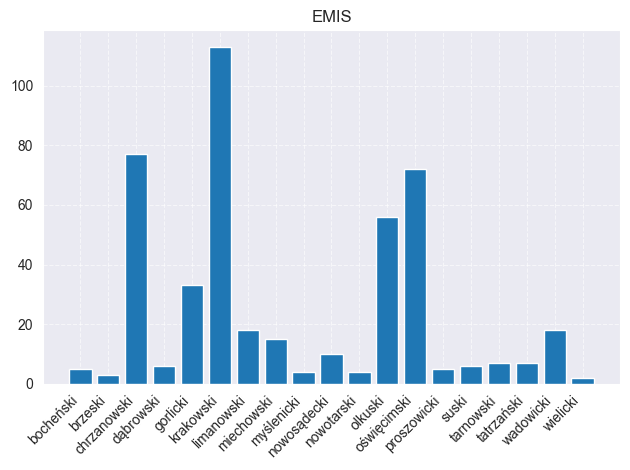

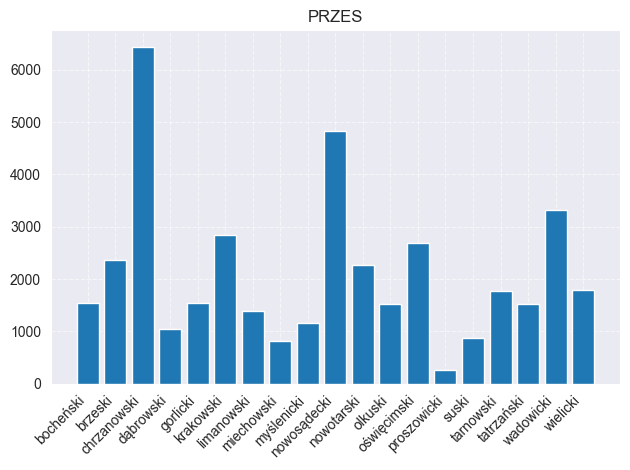

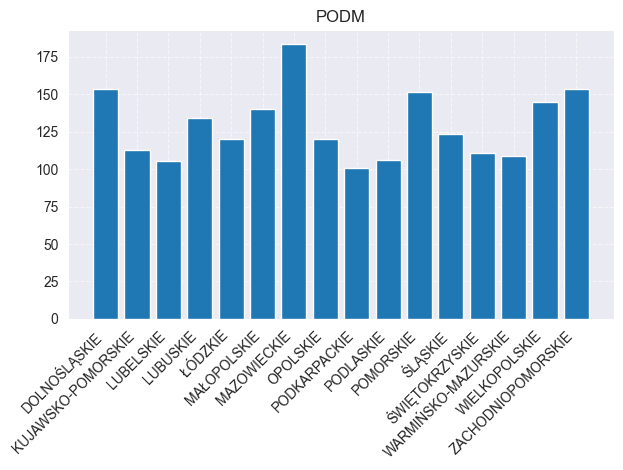

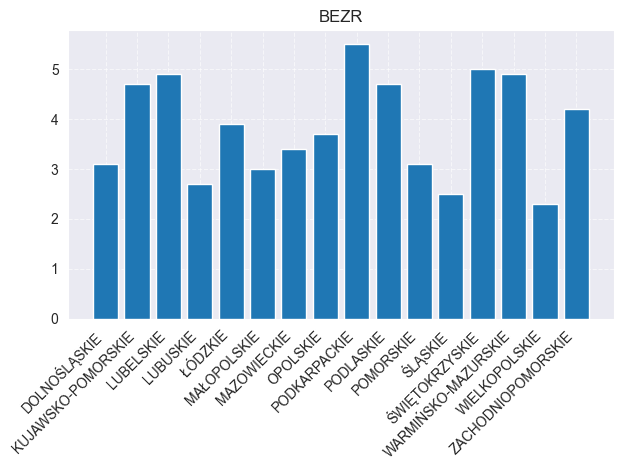

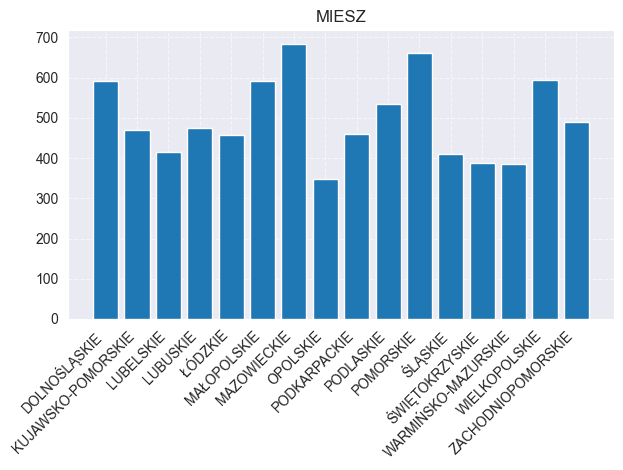

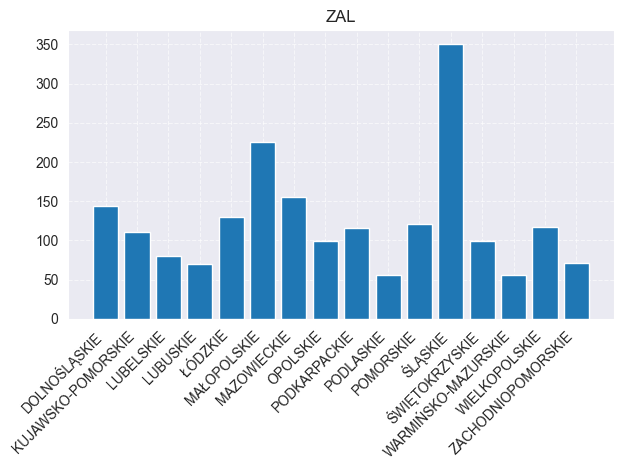

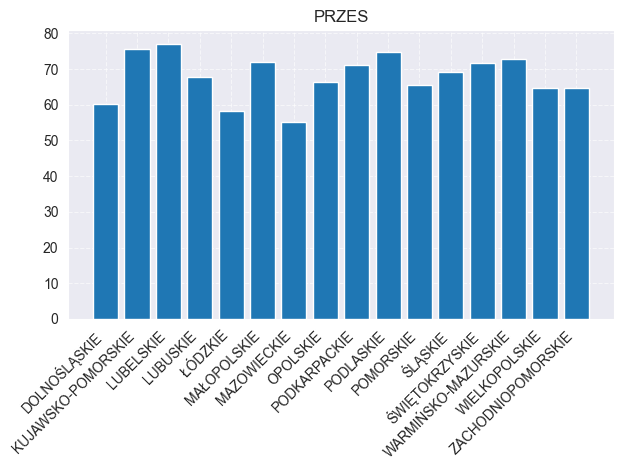

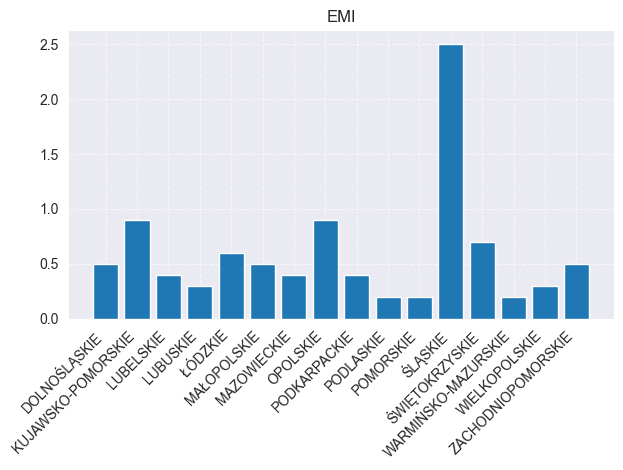

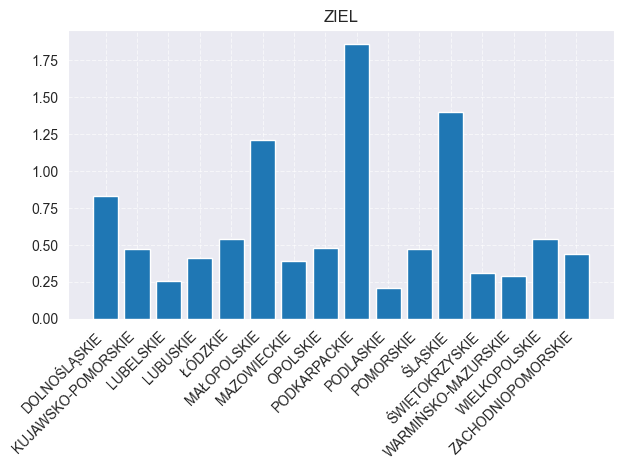

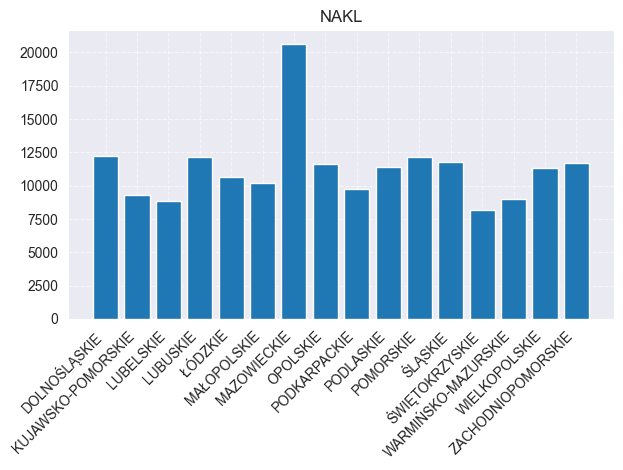

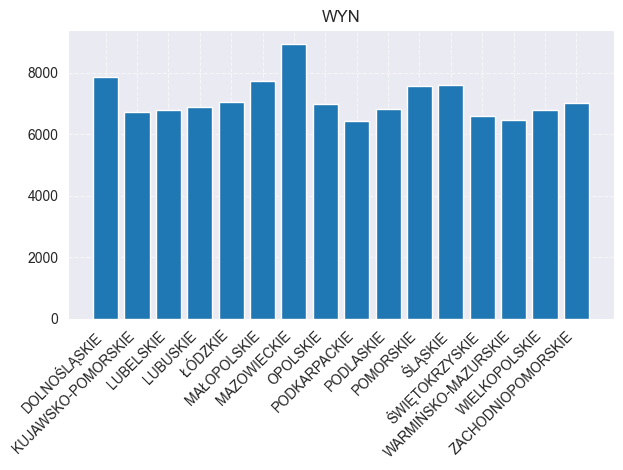

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

powiaty = pd.read_excel("DanePowiaty2023.xlsx")
powiaty["Powiat"] = powiaty["Powiat"].str.replace("Powiat ", "")

wojewodztwa = pd.read_excel("DaneWojewodztwa2023.xlsx")
print(powiaty.describe())
print(wojewodztwa.describe())

X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    #plt.show()

X = wojewodztwa["wojewodztwo"]
for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    #plt.show()








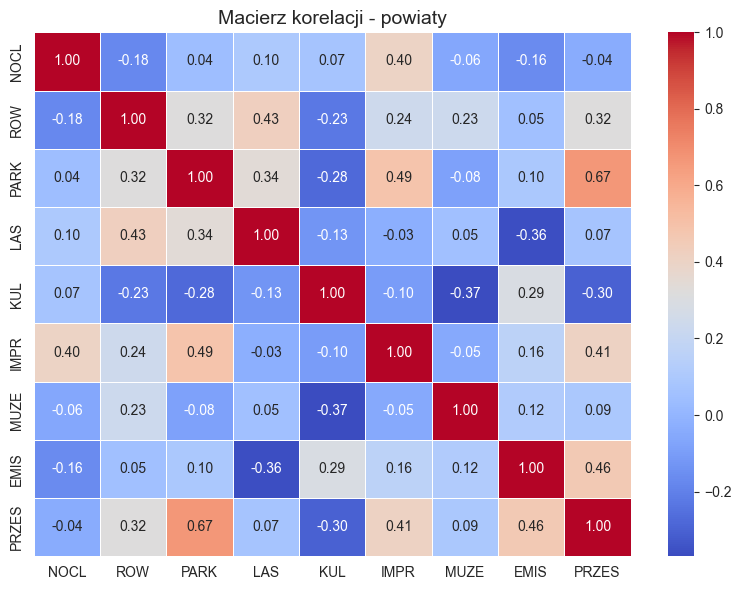

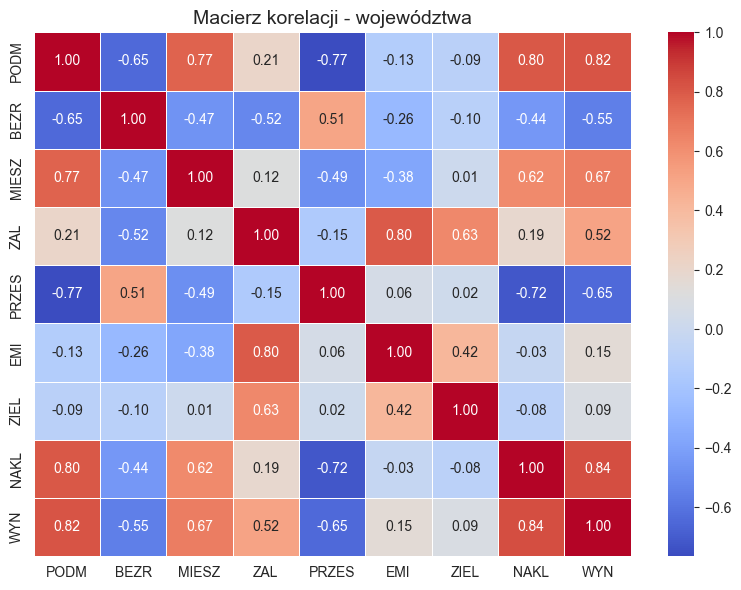

In [134]:

corr = powiaty.drop(columns=["Powiat"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - powiaty", fontsize=14)
plt.tight_layout()
plt.show()
corr2 = wojewodztwa.drop(columns=["wojewodztwo"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - województwa", fontsize=14)
plt.tight_layout()
plt.show()


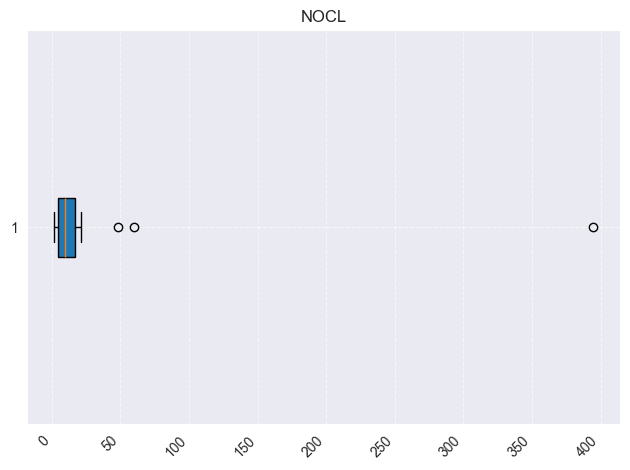

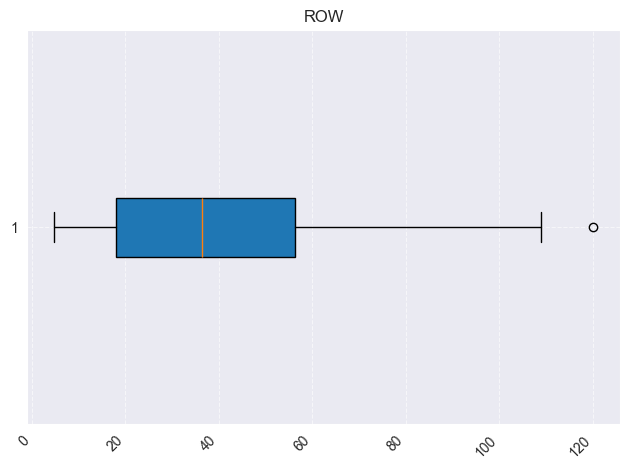

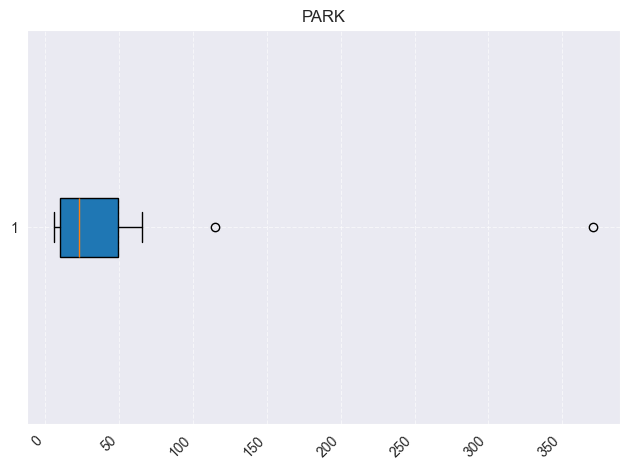

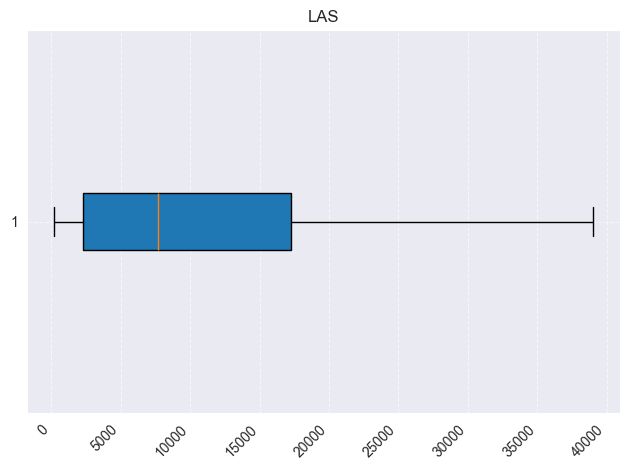

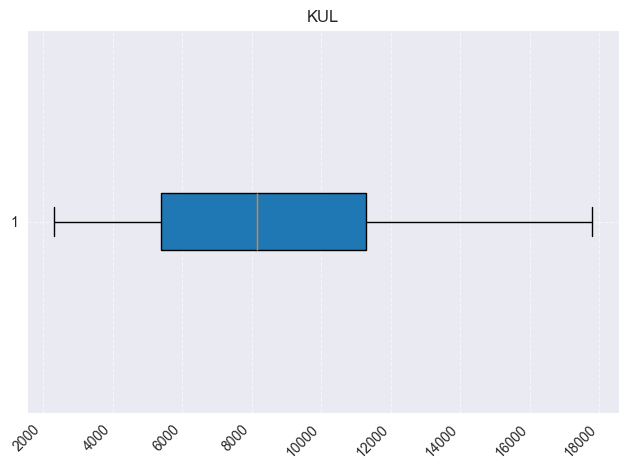

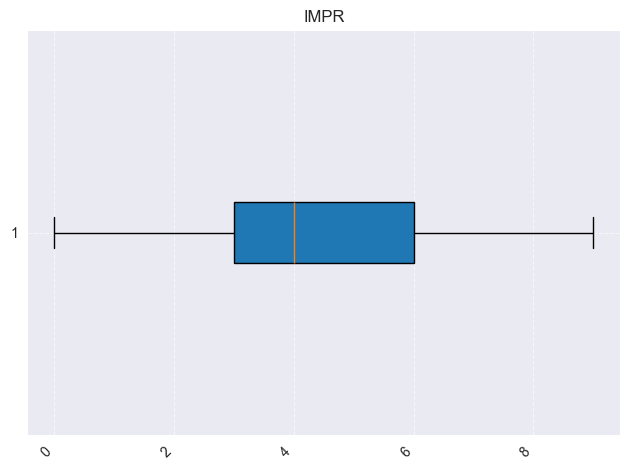

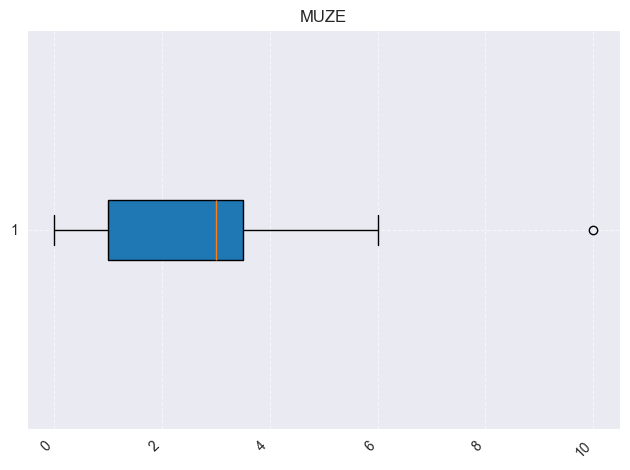

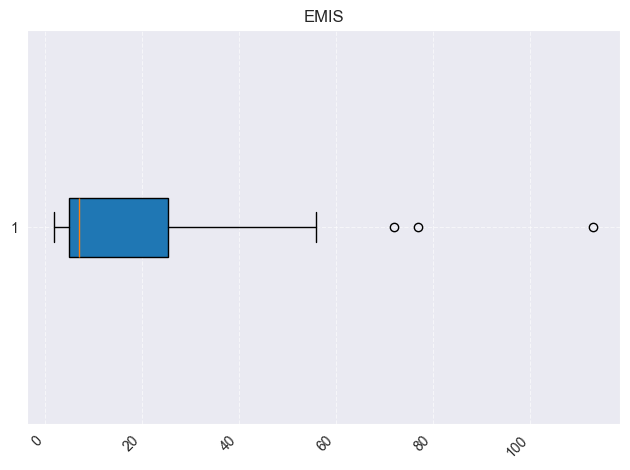

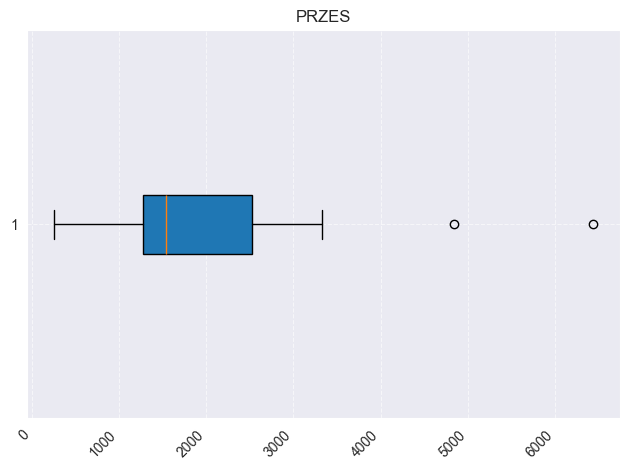

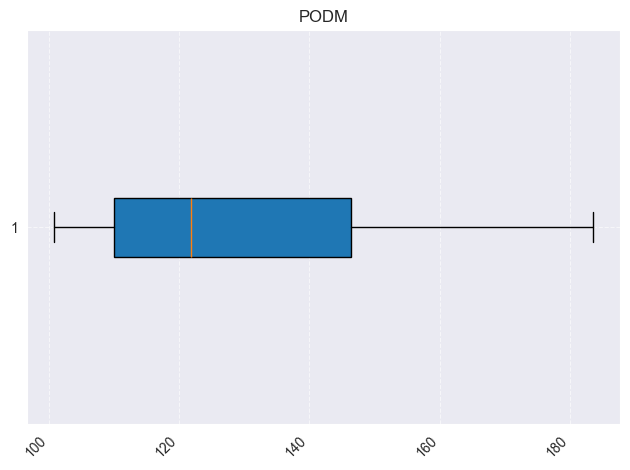

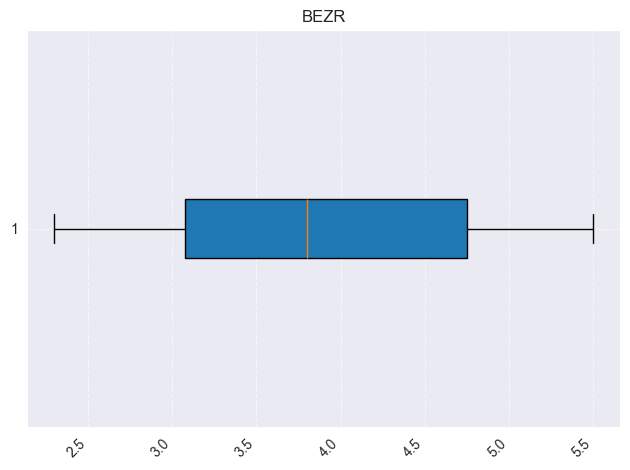

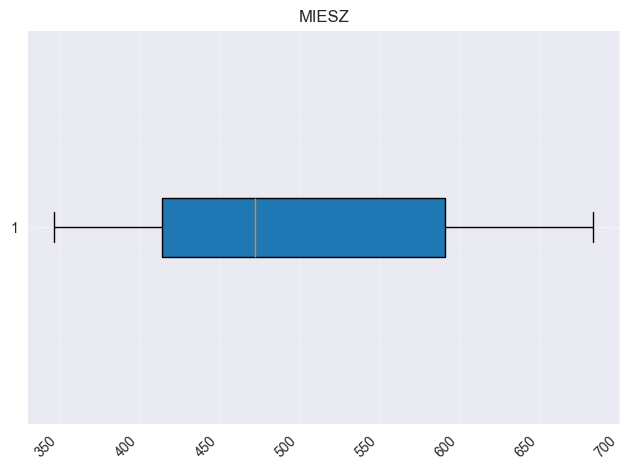

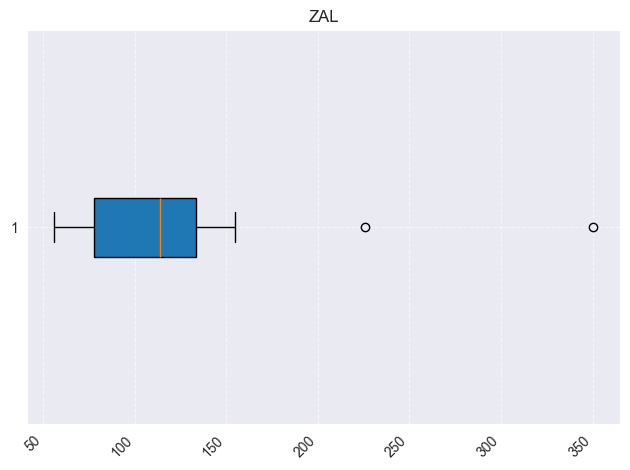

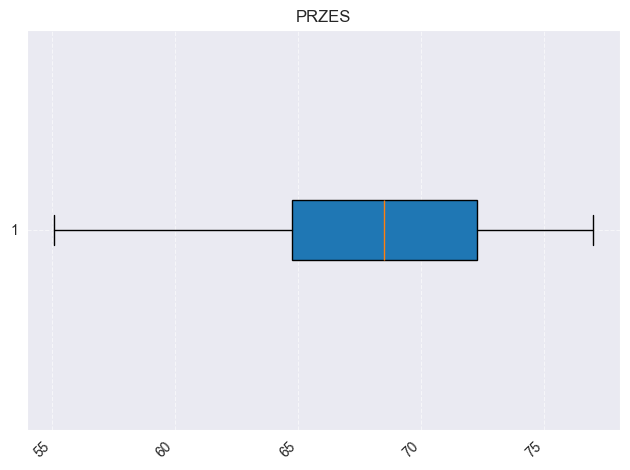

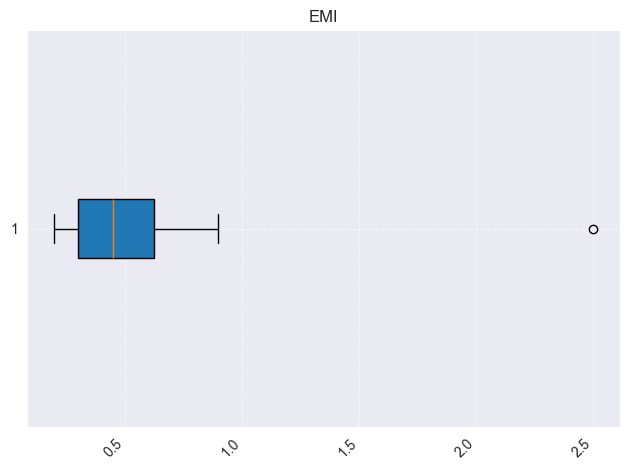

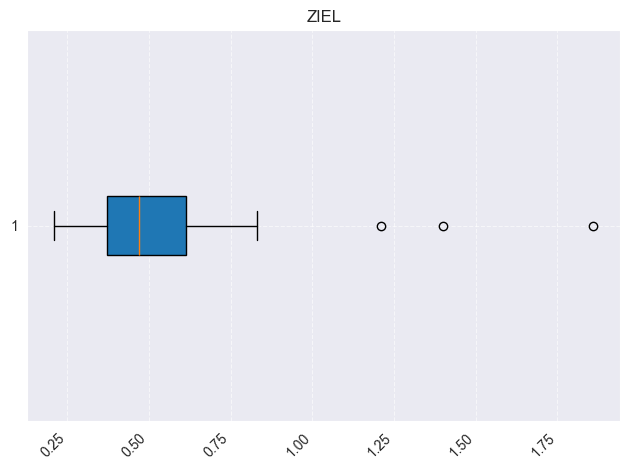

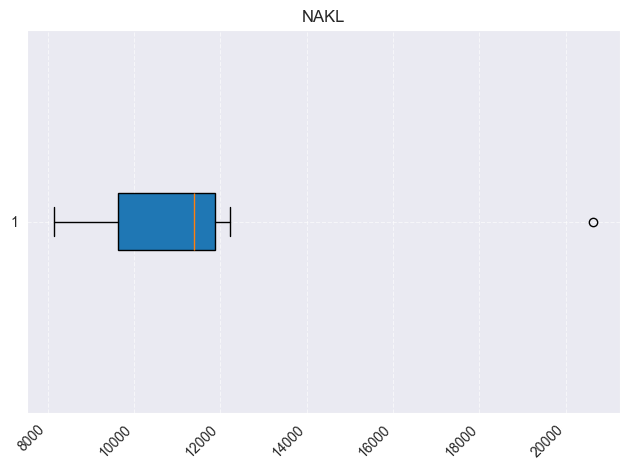

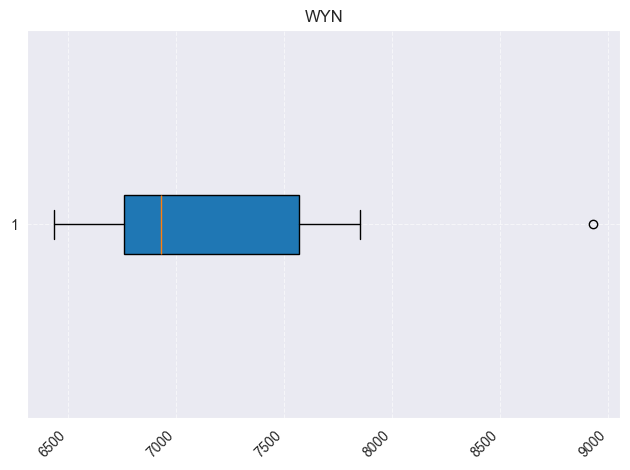

In [135]:
X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

X = wojewodztwa["wojewodztwo"]

for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    #plt.show()


In [136]:
stymulanty_woj = ["PODM","PRZES", "ZIEL", "WYN", "NAKL"]
nominanty_woj = [ "MIESZ", "ZAL"]
destymulanty_woj = ["BEZR", "EMI"]

wojewodztwa_stand = wojewodztwa
optimum = [500,150]




# Przekształcenie nominatów oraz destymulant
for col in wojewodztwa_stand.columns:
    if col in nominanty_woj:
        opt = optimum[nominanty_woj.index(col)]
        for row in range(len(wojewodztwa_stand)):
            val = wojewodztwa_stand.loc[row, col]
            if val == opt:
                wojewodztwa_stand.loc[row, col] = 1
            elif val > opt:
                wojewodztwa_stand.loc[row, col] = 1 / (val - opt + 1)
            else:
                wojewodztwa_stand.loc[row, col] = -1 / (val - opt - 1)
    if col in destymulanty_woj:
        wojewodztwa_stand[col] = -wojewodztwa_stand[col]





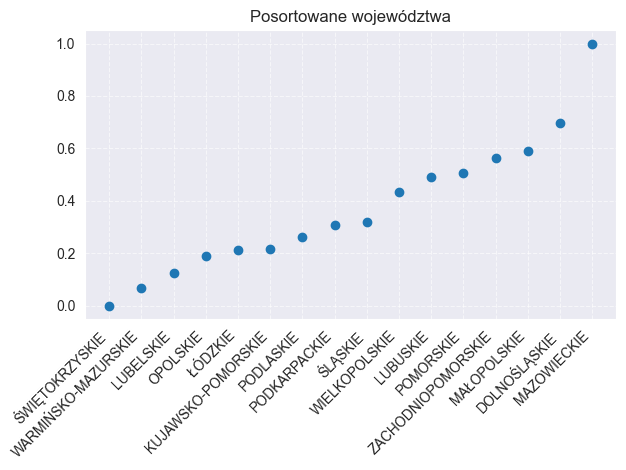

            wojewodztwo  syntetyczna_standaryzowana
0        ŚWIĘTOKRZYSKIE                    0.000000
1   WARMIŃSKO-MAZURSKIE                    0.069347
2             LUBELSKIE                    0.123767
3              OPOLSKIE                    0.188350
4               ŁÓDZKIE                    0.212792
5    KUJAWSKO-POMORSKIE                    0.215009
6             PODLASKIE                    0.263152
7          PODKARPACKIE                    0.308264
8               ŚLĄSKIE                    0.321085
9         WIELKOPOLSKIE                    0.432526
10             LUBUSKIE                    0.491608
11            POMORSKIE                    0.505045
12   ZACHODNIOPOMORSKIE                    0.562388
13          MAŁOPOLSKIE                    0.588477
14         DOLNOŚLĄSKIE                    0.696187
15          MAZOWIECKIE                    1.000000


In [137]:
# Normalizacja po kolumnach — tylko liczby!
wojewodztwa_porz = wojewodztwa_stand

for col in wojewodztwa_porz.select_dtypes(include="number").columns:
    mean = statistics.mean(wojewodztwa_porz[col])
    stdev = statistics.stdev(wojewodztwa_porz[col])
    wojewodztwa_porz[col] = (wojewodztwa_porz[col] - mean) / stdev

# Budowa kolumny syntetycznej - po wszystkich cechach liczbowych dla każdego wiersza
wojewodztwa_porz["syntetyczna"] = wojewodztwa_porz.select_dtypes(include="number").mean(axis=1)



syntetyczna = wojewodztwa_porz["syntetyczna"]
min_s = syntetyczna.min()
max_s = syntetyczna.max()

wojewodztwa_porz["syntetyczna_standaryzowana"] = (syntetyczna - min_s) / (max(syntetyczna - min_s))



posortowane = wojewodztwa_porz[["wojewodztwo", "syntetyczna_standaryzowana"]].sort_values(by="syntetyczna_standaryzowana", ascending=True).reset_index(drop=True)


fig, ax = plt.subplots()
X = range(len(posortowane))
Y = posortowane["syntetyczna_standaryzowana"].values
labels = posortowane["wojewodztwo"]

ax.scatter(X, Y, zorder=3)


ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
ax.set_title("Posortowane województwa")
plt.xticks(X, labels, rotation=45, ha='right')
fig.tight_layout()
plt.show()

print(posortowane)

            wojewodztwo  syntetyczna_rangi_srednia
0        ŚWIĘTOKRZYSKIE                  12.818182
1   WARMIŃSKO-MAZURSKIE                  12.000000
2             LUBELSKIE                  11.000000
3              OPOLSKIE                  10.181818
4    KUJAWSKO-POMORSKIE                   9.454545
5          PODKARPACKIE                   9.363636
6             PODLASKIE                   9.181818
7               ŁÓDZKIE                   9.090909
8               ŚLĄSKIE                   7.727273
9         WIELKOPOLSKIE                   7.181818
10   ZACHODNIOPOMORSKIE                   7.000000
11             LUBUSKIE                   6.727273
12          MAŁOPOLSKIE                   6.090909
13            POMORSKIE                   6.000000
14          MAZOWIECKIE                   5.727273
15         DOLNOŚLĄSKIE                   4.909091


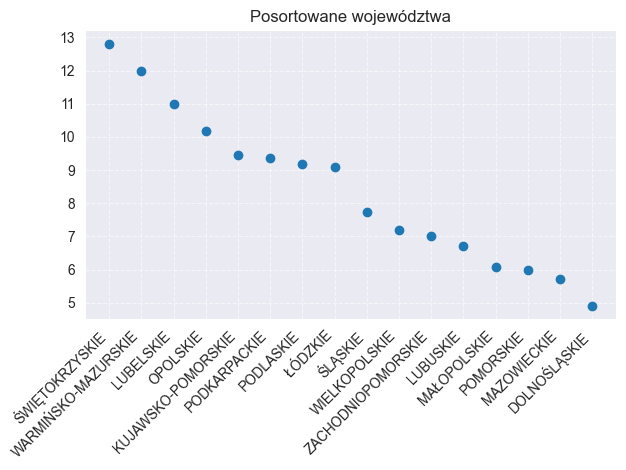

In [138]:

wojewodztwa_rang = wojewodztwa_stand
rangi_cols = []
for col in wojewodztwa_rang.select_dtypes(include="number").columns:
    # Ustal kierunek sortowania rang (większa wartość = lepsza), zwykle ascending=False
    rang_col = f"{col}_rang"
    wojewodztwa_rang[rang_col] = wojewodztwa_rang[col].rank(ascending=False, method='min')
    rangi_cols.append(rang_col)

# Krok 2: Agregacja rang
wojewodztwa_rang["syntetyczna_rangi_suma"] = wojewodztwa_rang[rangi_cols].sum(axis=1)
wojewodztwa_rang["syntetyczna_rangi_srednia"] = wojewodztwa_rang[rangi_cols].mean(axis=1)

# Jeśli chcesz wagi (opcjonalnie, suma wag musi być 1):
# Przykład:
wagi = {col: 1/len(rangi_cols) for col in rangi_cols}  # równy podział wag
wojewodztwa_rang["syntetyczna_rangi_wagi"] = wojewodztwa_rang[rangi_cols].mul(pd.Series(wagi)).sum(axis=1)

# Krok 3: Posortowany ranking według syntetycznej miary rang
posortowane_rang = wojewodztwa_rang[["wojewodztwo", "syntetyczna_rangi_srednia"]].sort_values(by="syntetyczna_rangi_srednia", ascending=False).reset_index(drop=True)
print(posortowane_rang)



fig, ax = plt.subplots()
X = range(len(posortowane_rang))
Y = posortowane_rang["syntetyczna_rangi_srednia"].values
labels = posortowane_rang["wojewodztwo"]

ax.scatter(X, Y, zorder=3)


ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
ax.set_title("Posortowane województwa")
plt.xticks(X, labels, rotation=45, ha='right')
fig.tight_layout()
plt.show()
